In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
#import dask.dataframe as dd
from matplotlib import rcParams
import warnings
import datetime
import plotly.express as px
# import missingno as msno
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data



In [5]:
df = pd.read_excel('youtube_statistics.xlsx')

In [6]:
df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


# Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [8]:
# Convert 'category_id' column to object type
df['category_id'] = df['category_id'].astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  object        
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [9]:
# Convert the column into lowercase
df.columns = df.columns.str.lower()

In [10]:
# Checking null value
df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
no_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

terdapat 45 null value pada kolom description

In [11]:
# Checking duplicated rows
df.duplicated().sum()

4229

terdapat 4229 baris yang memiliki nilai duplikat

In [12]:
cats_col = ['trending_date', 'category_id','channel_title','publish_time', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
nums_col = ['views', 'likes', 'dislikes', 'comment_count', 'no_tags', 'desc_len', 'len_title']

print("Categorical columns:", cats_col)
print("Numerical columns:", nums_col)

Categorical columns: ['trending_date', 'category_id', 'channel_title', 'publish_time', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
Numerical columns: ['views', 'likes', 'dislikes', 'comment_count', 'no_tags', 'desc_len', 'len_title']


In [13]:
df[nums_col].describe()

,views,likes,dislikes,comment_count,no_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


1. Nilai rata-rata (mean) dan nilai tengah (median) untuk fitur views, likes, dislikes, dan comment_count sangat jauh berbeda. Hal ini mungkin disebabkan oleh beberapa video yang sedang trending.

2. Nilai minimum dan maksimum pada setiap kolom terlalu ekstrem, kecuali pada kolom no_tags dan len_title

# Univariate Analysis


## Univariate Analysis Categorical

In [14]:
#Univariate Analysis on cats
for col in cats_col:
  print(f'''Value Count Kolom {col}''')
  print(df[col].value_counts())
  print()

Value Count Kolom trending_date
trending_date
2017-12-23    199
2017-12-22    198
2018-04-15    198
2018-05-05    198
2017-12-16    197
             ... 
2018-03-26    151
2018-02-03    151
2017-12-20    149
2018-03-04    148
2018-03-15    110
Name: count, Length: 205, dtype: int64

Value Count Kolom category_id
category_id
24    16462
25     5173
10     3857
23     3407
22     2494
1      1649
27     1180
26      837
17      712
28      548
43      205
29      105
2        69
20       66
30       16
19        8
15        3
Name: count, dtype: int64

Value Count Kolom channel_title
channel_title
VikatanTV                   284
etvteluguindia              282
Flowers Comedy              270
ETV Plus India              251
SAB TV                      244
                           ... 
Anil Yadav Entertainment      1
KCT News                      1
Delhi Darpan TV               1
PropheC Productions           1
Business Of Cinema            1
Name: count, Length: 1390, dtype: int64

Valu

In [15]:
df[cats_col].describe()

,trending_date,category_id,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791,36791,36791,36791,36791,36791
unique,205,17,1390,12375,12463,2,2,2
top,2017-12-23,24,VikatanTV,04:30:00,[none],False,False,False
freq,199,16462,284,333,1120,35611,36034,36780


1. video didominasi oleh kategori 24
2. video didominasi oleh chanel VikatanTV
3. dari seluruh video, paling banyak di publish pada pukul 04:30
4. Pada kolom tags, tidak ada nilai yang paling sering muncul. Hal ini mungkin disebabkan oleh beragam cara penulisan tag.
5. hanya sedikit video yang memiliki komentar dinonaktifkan, rating dinonaktifkan, atau video yang mengalami error atau telah dihapus.(hampir semua bernilai false)

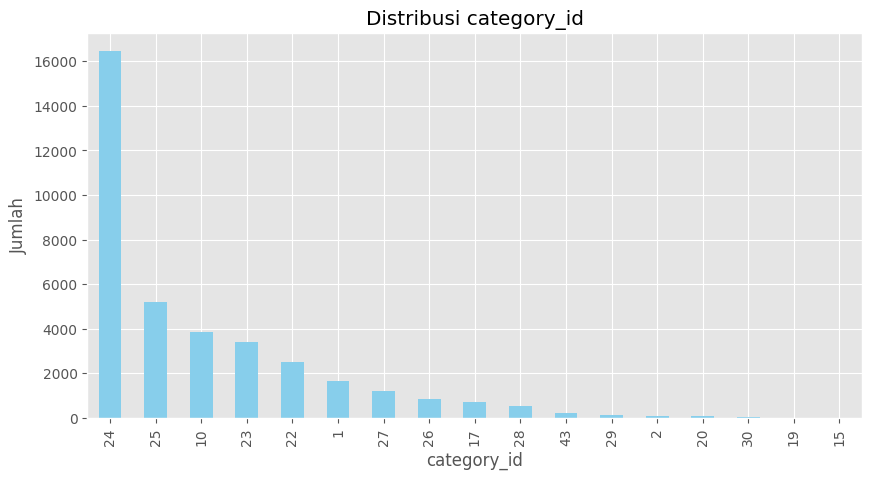

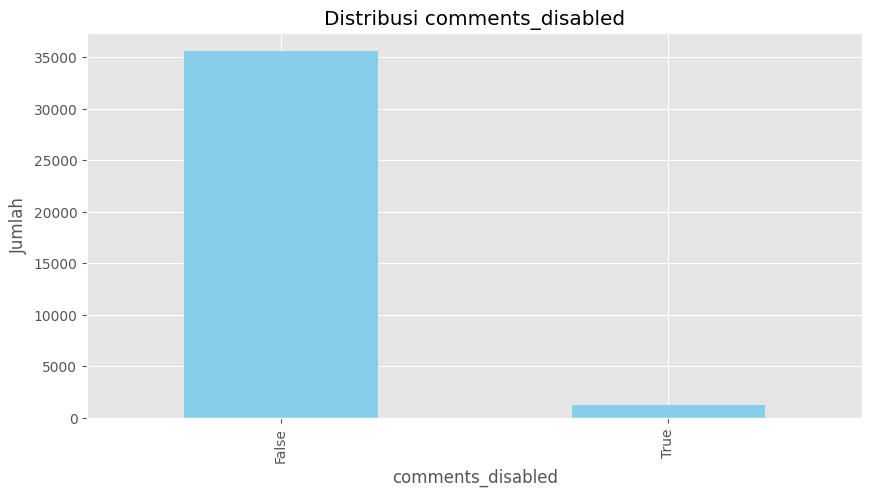

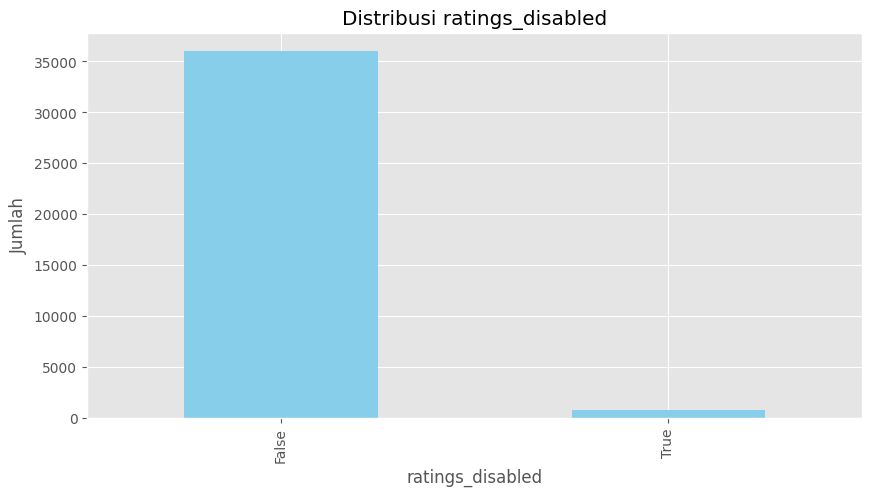

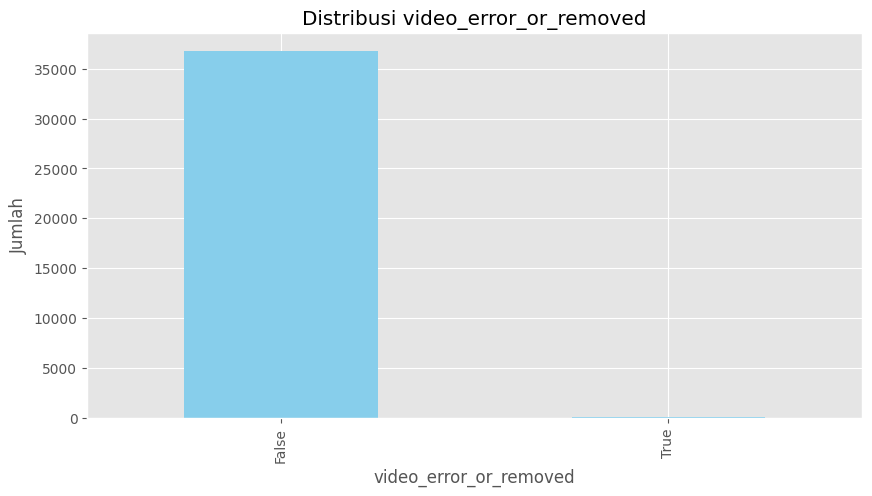

In [16]:
# Plotting bar chart for specified categorical variables
plt.style.use("ggplot")

# List of specific categorical columns to plot
specific_cats_col = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']

for column in specific_cats_col:
    plt.figure(figsize=(10, 5))
    df[column].value_counts().plot(kind="bar", color='skyblue')
    plt.xlabel(column)
    plt.ylabel("Jumlah")
    plt.title(f"Distribusi {column}")
    plt.show()


## Univariate Analysis Numerical

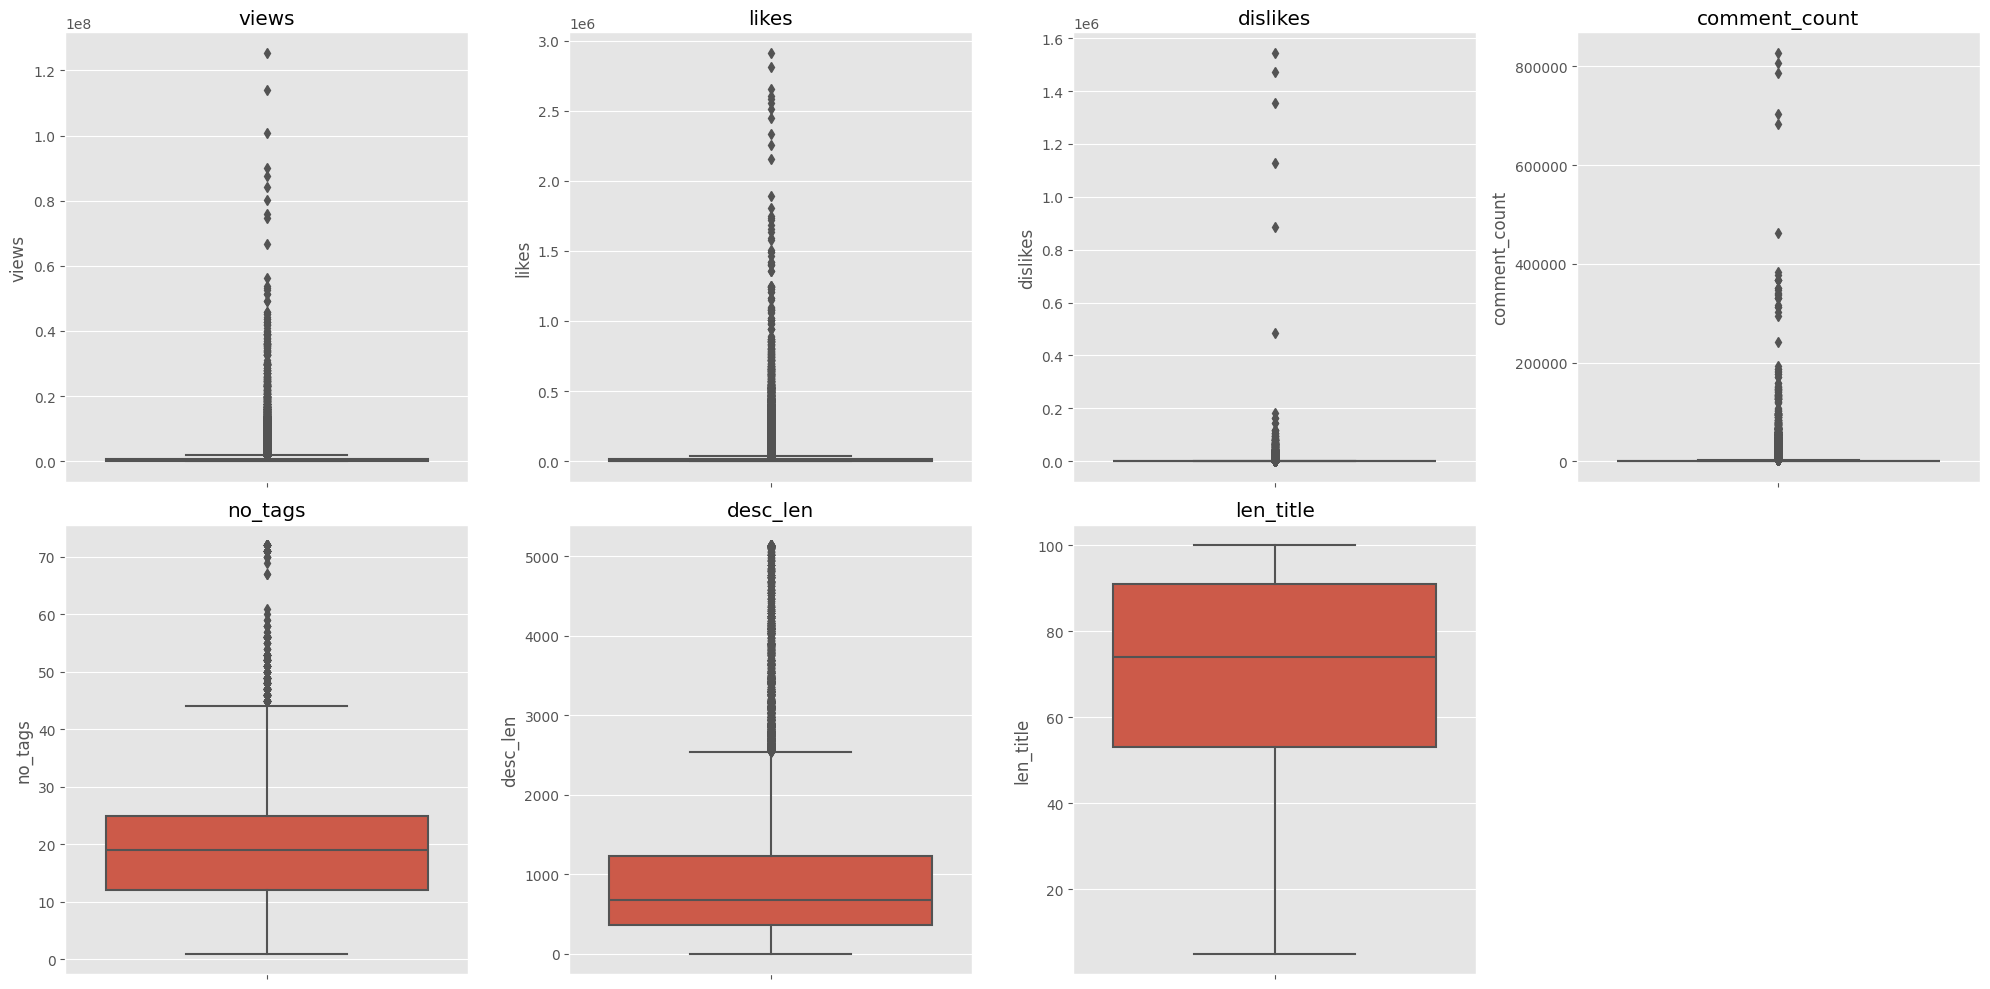

In [20]:
#Outliers

# Assuming 'nums_col' contains the numerical column names from your previous code.
num_plots = len(nums_col)
num_rows = math.ceil(num_plots / 4)  # Calculate the number of rows needed

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on the number of rows

for i, col in enumerate(nums_col):
    plt.subplot(num_rows, 4, i + 1)  # Create subplots in a 4-column grid
    sns.boxplot(y=df[col], orient='v')  # Vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

pada numerikal feature hanya kolom len_title yang tidak memiliki outlier

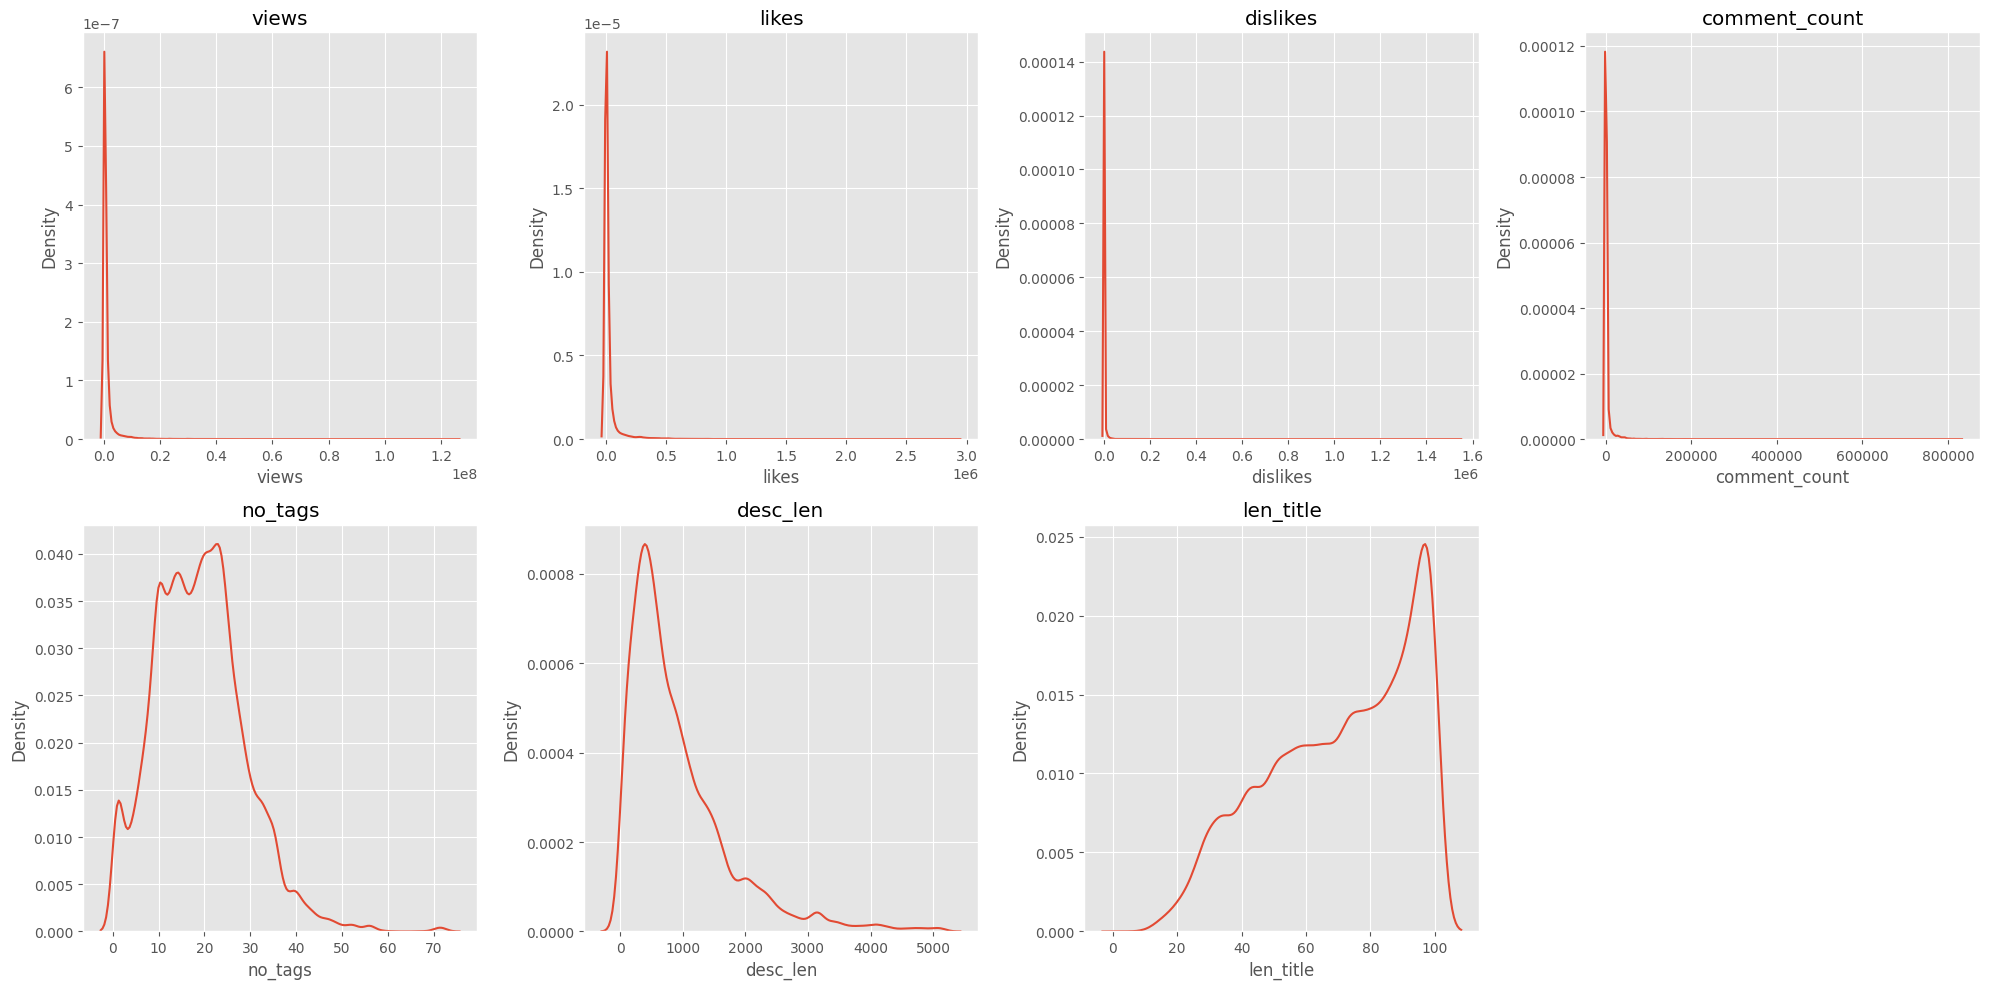

In [ ]:
# Distribusi Data

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming 'nums_col' and 'df' are defined from your previous code.



In [21]:
from scipy.stats import kurtosis
print(f"Kurtosis Co-efficient Likes: {round(df.likes.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Dislikes: {round(df.dislikes.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Views: {round(df.views.kurtosis(), 3)}")
print(f"Kurtosis Co-efficient Comment Count: {round(df.comment_count.kurtosis(), 3)}")

Kurtosis Co-efficient Likes: 193.855
Kurtosis Co-efficient Dislikes: 6294.719
Kurtosis Co-efficient Views: 254.932
Kurtosis Co-efficient Comment Count: 1110.641


1. kolom view, like, dislike, memiliki, comment count, memiliki distribusi right-skewed karena adanya nilai ekstrem
2. kolom no_tags (right-skewed), desc_len (right-skewed), dan len_title(left-skewed) memiliki distribusi yang lebih baik dibanding kolom lainnya karena data tidak terlalu ekstrem

# Mulivariate Analysis

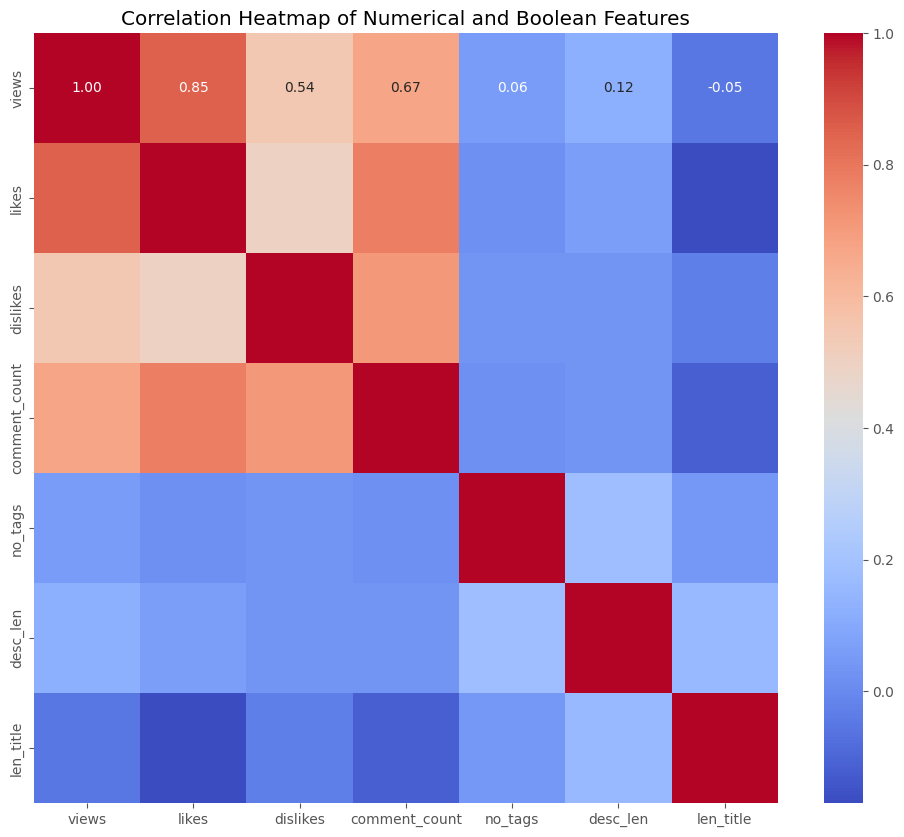

In [22]:
# Heatmap correlation

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[nums_col].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical and Boolean Features')
plt.show()

1. Popularitas Konten: Heatmap ini menunjukkan bahwa popularitas konten (diukur dari views, likes, dislikes, dan comments) sangat saling berkaitan. Konten yang populer cenderung mendapatkan banyak interaksi dari pengguna.
2. Peran Tag dan Deskripsi: Jumlah tag dan panjang deskripsi tampaknya memiliki sedikit pengaruh terhadap popularitas konten, meskipun korelasinya tidak terlalu kuat.

<Figure size 2400x1000 with 0 Axes>

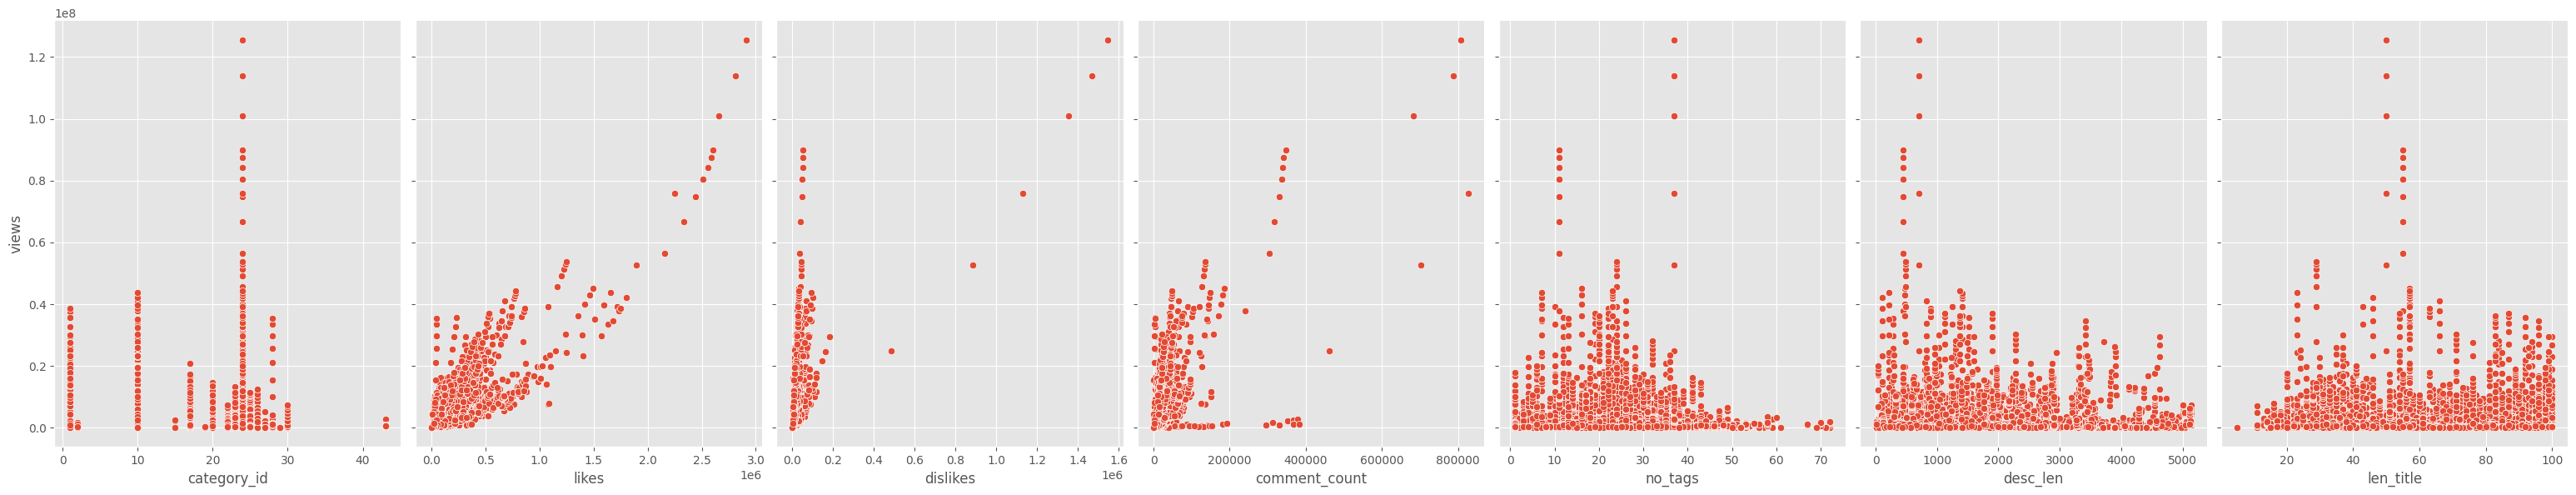

In [ ]:
#Feature & Target Correlation

plt.figure(figsize=(24,10))
fig = sns.pairplot(data=df, x_vars=['category_id','likes','dislikes','comment_count','no_tags','desc_len','len_title'], y_vars=['views'], height=6, aspect=0.75);
fig.tight_layout()

Sebagian besar titik data terkonsentrasi pada nilai yang rendah pada sumbu y (yang kemungkinan mewakili variabel "views"). Ini mengindikasikan bahwa sebagian besar data memiliki jumlah views yang relatif sedikit.

Sebagian besar plot tidak menunjukkan pola garis lurus yang jelas. Ini menunjukkan bahwa tidak ada hubungan linear yang kuat antara variabel independen (sumbu x) dan variabel dependen (sumbu y). Artinya, perubahan pada variabel independen tidak selalu diikuti oleh perubahan yang proporsional pada variabel dependen.

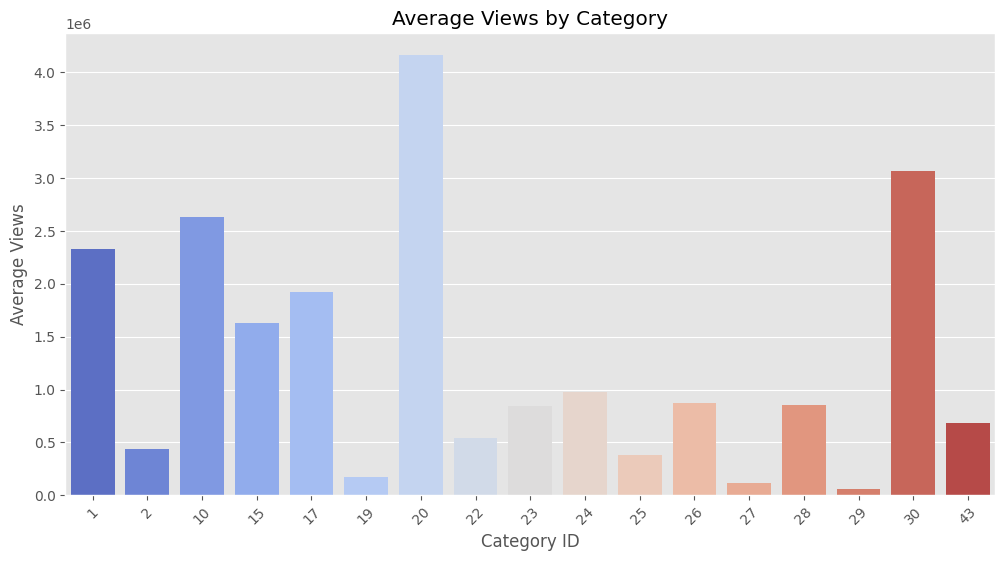

In [24]:
# Category vs Average Views
avg_views_by_category = df.groupby('category_id')['views'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_views_by_category.index, y=avg_views_by_category.values, palette='coolwarm')
plt.title('Average Views by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()

Terdapat perbedaan yang sangat signifikan dalam rata-rata jumlah views antara satu kategori dengan kategori lainnya. Beberapa kategori memiliki rata-rata views yang sangat tinggi, sementara yang lainnya jauh lebih rendah.

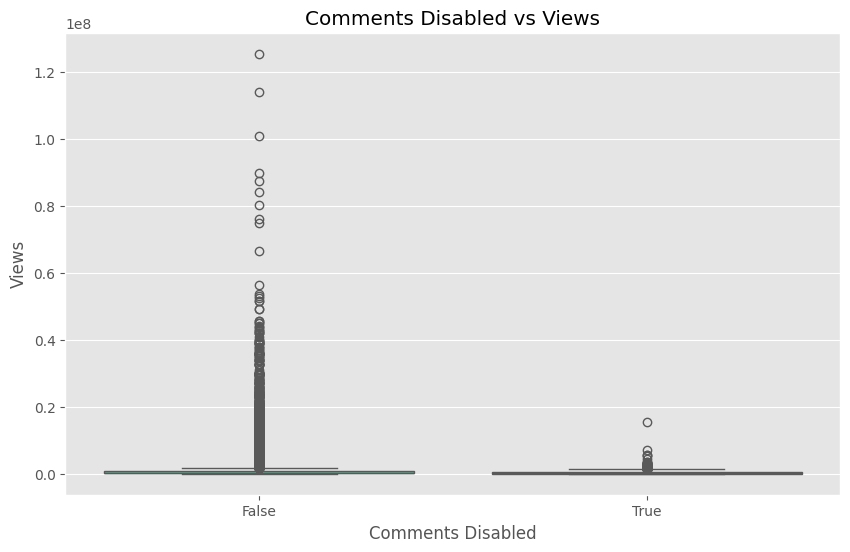

In [ ]:
#Comments Disabled vs Views
plt.figure(figsize=(10, 6))
sns.boxplot(x='comments_disabled', y='views', data=df, palette='Set2')
plt.title('Comments Disabled vs Views')
plt.xlabel('Comments Disabled')
plt.ylabel('Views')
plt.show()

Ketika komentar tidak dinonaktifkan (False), jumlah views lebih beragam, dengan beberapa video memiliki views yang sangat tinggi (outliers).
Ketika komentar dinonaktifkan (True), jumlah views tampaknya lebih terkonsentrasi pada angka yang lebih rendah dibandingkan dengan video di mana komentar aktif

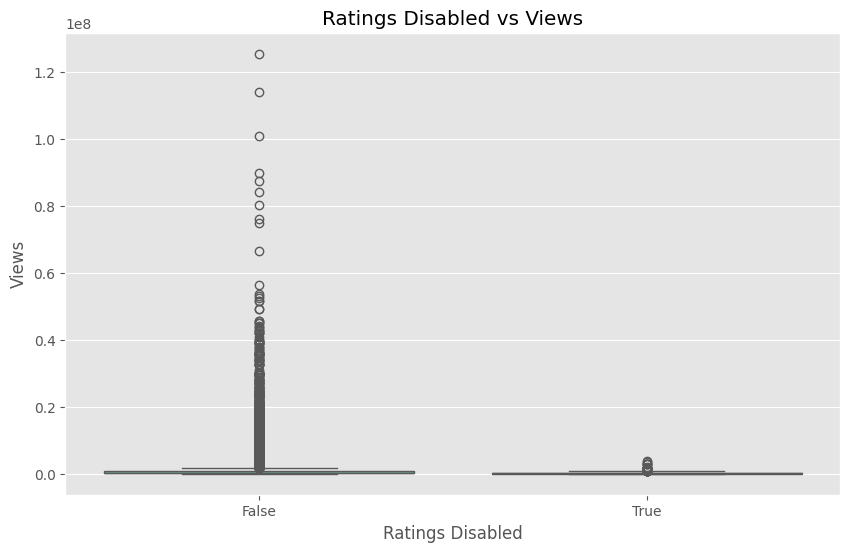

In [ ]:
#Ratings Disabled vs Views
plt.figure(figsize=(10, 6))
sns.boxplot(x='ratings_disabled', y='views', data=df, palette='Set2')
plt.title('Ratings Disabled vs Views')
plt.xlabel('Ratings Disabled')
plt.ylabel('Views')
plt.show()


Ketika ratings tidak dinonaktifkan (False), jumlah views lebih beragam, dengan beberapa video memiliki views yang sangat tinggi (outliers). Ketika ratings dinonaktifkan (True), jumlah views tampaknya lebih terkonsentrasi pada angka yang lebih rendah dibandingkan dengan video di mana rating aktif

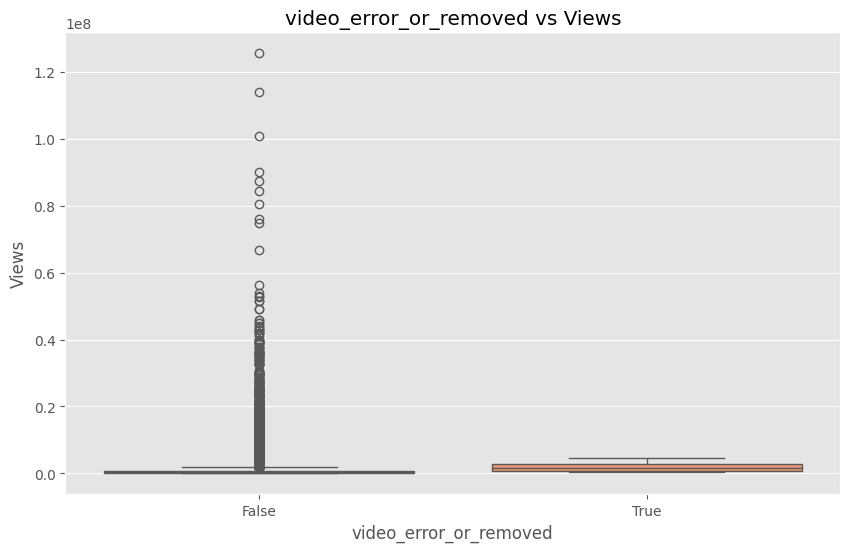

In [ ]:
#Video Error or Removed vs Views
plt.figure(figsize=(10, 6))
sns.boxplot(x='video_error_or_removed', y='views', data=df, palette='Set2')
plt.title('video_error_or_removed vs Views')
plt.xlabel('video_error_or_removed')
plt.ylabel('Views')
plt.show()


ketika video tidak eror atau tidak dihapus maka views tinggi, sedangkan jika video error atau dihapus maka views rendah

# Data Cleaning


## Drop Duplicate Row

In [25]:
# Delete duplicated

data_cleaning = df.copy()
data_cleaning = data_cleaning.drop_duplicates(keep='first')
print(f'Jumlah duplikat: {data_cleaning.duplicated().sum()}')

Jumlah duplikat: 0


In [26]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32562 non-null  object        
 1   title                   32562 non-null  object        
 2   channel_title           32562 non-null  object        
 3   category_id             32562 non-null  object        
 4   publish_time            32562 non-null  object        
 5   tags                    32562 non-null  object        
 6   views                   32562 non-null  int64         
 7   likes                   32562 non-null  int64         
 8   dislikes                32562 non-null  int64         
 9   comment_count           32562 non-null  int64         
 10  comments_disabled       32562 non-null  bool          
 11  ratings_disabled        32562 non-null  bool          
 12  video_error_or_removed  32562 non-null  bool       

## Drop feature yang kurang relevan

Fitur title, channel_title, publish_time, tags, dan description, yang akan dihapus karena memiliki nilai unique yang terlalu banyak dan tidak menunjukkan pola tertentu

In [ ]:
data_cleaning = data_cleaning.drop(['title', 'channel_title', 'publish_time', 'tags', 'description'], axis=1)
data_cleaning.head()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,no_tags,desc_len,len_title,publish_date
0,2017-11-14,1,1096327,33966,798,882,False,False,False,15,920,81,2017-11-12
1,2017-11-14,25,590101,735,904,0,True,False,False,19,2232,58,2017-11-13
2,2017-11-14,24,473988,2011,243,149,False,False,False,14,482,58,2017-11-12
3,2017-11-14,23,1242680,70353,1624,2684,False,False,False,20,263,30,2017-11-12
4,2017-11-14,24,464015,492,293,66,False,False,False,11,753,88,2017-11-13


## Handling Outliers

In [ ]:
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    column_name = df.columns[column]
    total_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    percent_outliers = round(((total_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Total outliers in ', column_name, ' :', total_outliers, ' and outliers percentage:', percent_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('Check the input')

In [ ]:
column = [2, 3, 4, 5, 9, 10, 11]

for i in range(0, len(column)):
    outlier_del(data_cleaning, column[i], 'summary')

Total outliers in  views  : 3733  and outliers percentage: 11.46 %
Total outliers in  likes  : 4955  and outliers percentage: 15.22 %
Total outliers in  dislikes  : 3899  and outliers percentage: 11.97 %
Total outliers in  comment_count  : 4222  and outliers percentage: 12.97 %
Total outliers in  no_tags  : 400  and outliers percentage: 1.23 %
Total outliers in  desc_len  : 1604  and outliers percentage: 4.93 %
Total outliers in  len_title  : 0  and outliers percentage: 0.0 %


In [ ]:
# Menghapus outliers pada data yang memiliki outliers percentage dibawah 5%
data_cleaning = data_cleaning[data_cleaning.index.isin(outlier_del(data_cleaning, 9, 'df').reset_index()['index'])]
data_cleaning = data_cleaning[data_cleaning.index.isin(outlier_del(data_cleaning, 10, 'df').reset_index()['index'])]
data_cleaning.shape

(30501, 13)

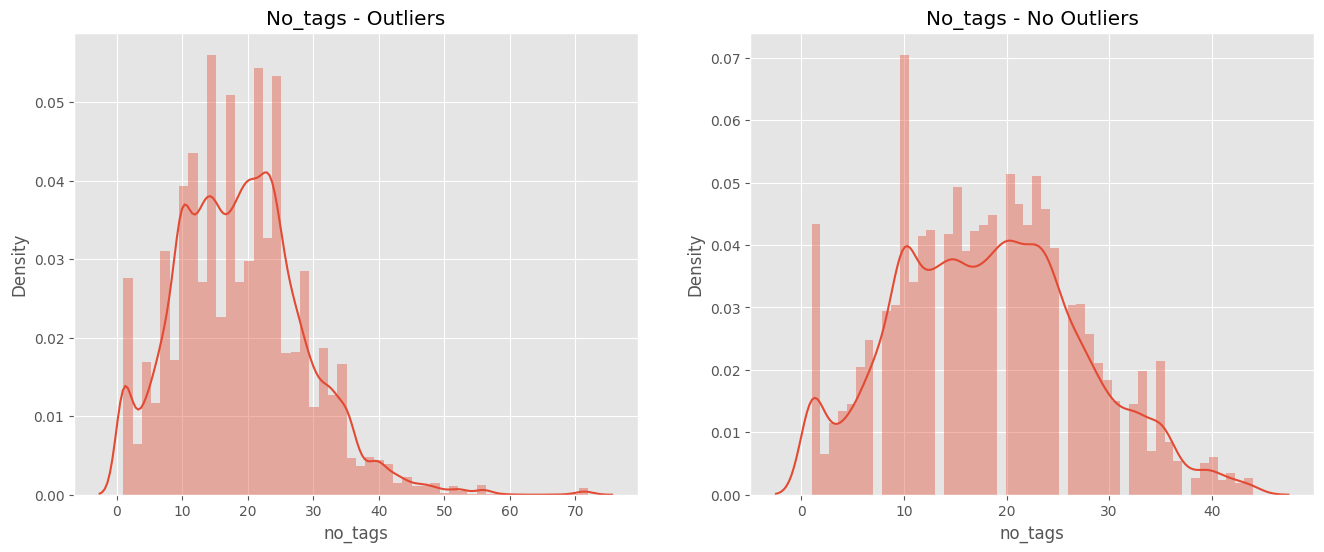

In [ ]:
# Create a plot to compare before after removing outliers
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(df.no_tags)
plt.title('No_tags - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(data_cleaning.no_tags)
plt.title('No_tags - No Outliers')
plt.show()

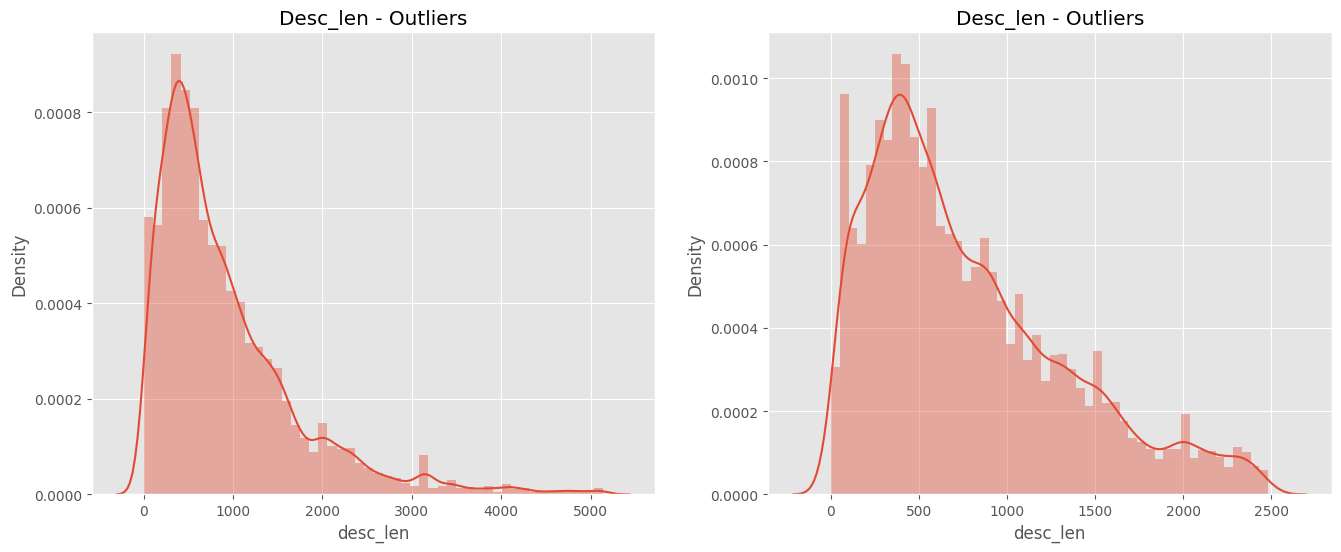

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(df.desc_len)
plt.title('Desc_len - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(data_cleaning.desc_len)
plt.title('Desc_len - Outliers')
plt.show()

# Feature Engineering

## Feature Extraction

menambahkan satu kolom baru yaitu kolom 'is_weekend' dnegan meng-extract kolom publish date (untuk tahu apakah jumlah view dipengaruhi oleh waktu publish di weekend atau weekday)

In [ ]:
data_cleaning['publish_date'] = data_cleaning['publish_date'].astype(str)
data_cleaning['publish_date'].head()

,publish_date
0,2017-11-12
1,2017-11-13
2,2017-11-12
3,2017-11-12
4,2017-11-13


In [ ]:
timeget = []
for i in data_cleaning['publish_date'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)

In [ ]:
data_cleaning['publish_date'] =  pd.to_datetime(timeget)
data_cleaning['day_of_week'] =data_cleaning['publish_date'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
def is_weekend(dmap):
    if dmap.weekday() < 5:
        return False
    else:
        return True
data_cleaning['is_weekend'] = data_cleaning['publish_date'].apply(is_weekend)

data_cleaning.head()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,no_tags,desc_len,len_title,publish_date,day_of_week,is_weekend
0,2017-11-14,1,1096327,33966,798,882,False,False,False,15,920,81,2017-11-12,6,True
1,2017-11-14,25,590101,735,904,0,True,False,False,19,2232,58,2017-11-13,0,False
2,2017-11-14,24,473988,2011,243,149,False,False,False,14,482,58,2017-11-12,6,True
3,2017-11-14,23,1242680,70353,1624,2684,False,False,False,20,263,30,2017-11-12,6,True
4,2017-11-14,24,464015,492,293,66,False,False,False,11,753,88,2017-11-13,0,False


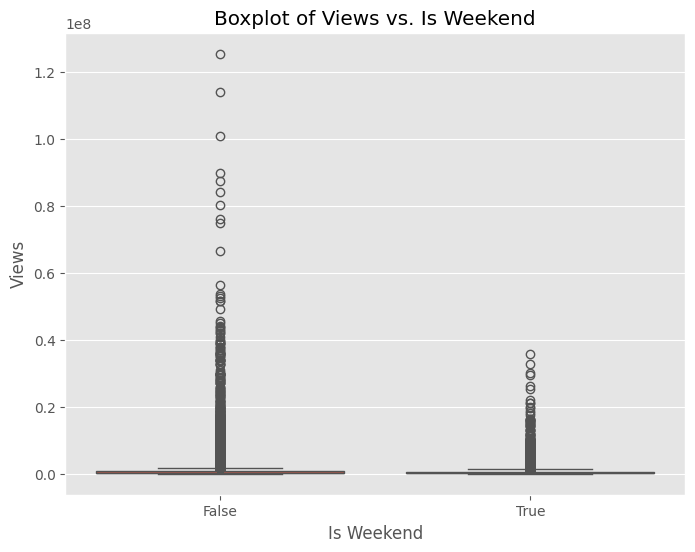

In [ ]:
# prompt: boxplot to know whether  is_weekend influenced on views not based on average

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='views', data=data_cleaning)
plt.title('Boxplot of Views vs. Is Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Views')
plt.show()

## Train & Test Split

In [ ]:
df_train_test = data_cleaning.copy()

In [ ]:
X = df_train_test[['category_id','likes','dislikes','comment_count','no_tags','desc_len','len_title','is_weekend','comments_disabled', 'ratings_disabled','video_error_or_removed','is_weekend']]
y = df_train_test[['views']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [ ]:
# Membuat data train dan data test
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
X_train

,category_id,likes,dislikes,comment_count,no_tags,desc_len,len_title,is_weekend,comments_disabled,ratings_disabled,video_error_or_removed,is_weekend
2016,24,6193,354,655,13,814,96,True,False,False,False,True
14482,22,568,70,21,1,399,96,False,False,False,False,False
27161,23,16933,770,523,26,1542,58,False,False,False,False,False
1227,23,35456,1305,2078,12,815,21,False,False,False,False,False
6927,24,6690,293,411,7,526,75,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
35762,24,9911,1645,1076,26,965,53,False,False,False,False,False
5714,27,2570,86,170,26,788,96,False,False,False,False,False
907,25,2380,633,309,16,37,37,False,False,False,False,False
17030,24,598,87,30,10,1448,60,False,False,False,False,False


## PreProcessing (Standarization)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
std_train = scaler.fit_transform(data_train)
std_test = scaler.transform(data_test)

# Mengembalikan nilai ke dataframe
std_train = pd.DataFrame(std_train, columns=data_train.columns)
std_test = pd.DataFrame(std_test, columns=data_test.columns)

In [ ]:
Xtrain_std = std_train.drop('views', axis=1)
ytrain_std = std_train.views
Xtest_std = std_test.drop('views', axis=1)
ytest_std = std_test.views

In [ ]:
Xtrain_std

,category_id,likes,dislikes,comment_count,no_tags,desc_len,len_title,is_weekend,comments_disabled,ratings_disabled,video_error_or_removed,is_weekend
0,0.0,0.330571,0.090571,0.353167,-0.384615,0.255319,0.594595,1.0,0.0,0.0,0.0,1.0
1,-2.0,-0.200704,-0.261787,-0.255278,-1.307692,-0.296543,0.594595,0.0,0.0,0.0,0.0,0.0
2,-1.0,1.344951,0.606700,0.226488,0.615385,1.223404,-0.432432,0.0,0.0,0.0,0.0,0.0
3,-1.0,3.094425,1.270471,1.718810,-0.461538,0.256649,-1.432432,0.0,0.0,0.0,0.0,0.0
4,0.0,0.377512,0.014888,0.119002,-0.846154,-0.127660,0.027027,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21345,0.0,0.681731,1.692308,0.757198,0.615385,0.456117,-0.567568,0.0,0.0,0.0,0.0,0.0
21346,3.0,-0.011617,-0.241935,-0.112284,0.615385,0.220745,0.594595,0.0,0.0,0.0,0.0,0.0
21347,1.0,-0.029562,0.436725,0.021113,-0.153846,-0.777926,-1.000000,0.0,0.0,0.0,0.0,0.0
21348,0.0,-0.197870,-0.240695,-0.246641,-0.615385,1.098404,-0.378378,0.0,0.0,0.0,0.0,0.0
